In [1]:
#30DayMapChallenge Day 7: Raster
#I went back to the 2018 OL Reign data available through @StatsBomb
#and "rasterized" it based on passing angle across the pitch where 0 degrees,
#or dark green, signifies passing straight ahead. #BoldTogether

#Raster code basis via @Hatarilabs

In [2]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import rasterio
import matplotlib.patches as patches
from matplotlib.colors import to_rgba

from mplsoccer import Pitch, FontManager, Sbopen, add_image
from urllib.request import urlopen
from PIL import Image
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

In [3]:
import json
  

dforig = pd.read_json('7480.json')
df = dforig
df.append(pd.read_json('7443.json'))
df.append(pd.read_json('7485.json'))
df.append(pd.read_json('7472.json'))
df.append(pd.read_json('7478.json'))
df.append(pd.read_json('7493.json'))
df.append(pd.read_json('7523.json'))

#Cleaning dataset
df = df.fillna(0)
df = df.loc[df.location != 0]
df = df.drop(columns=['id','tactics', 'related_events', 'counterpress', 'under_pressure',
       'ball_recovery', 'goalkeeper', 'duel', 'dribble',
       'foul_committed', 'interception', 'block', 'foul_won',
       'substitution']).reset_index()
df['x'] = df['location']
df['y'] = df['location']
for i in range(len(df)):
    df['x'][i] = df.location[i][0]
    df['y'][i] = df.location[i][1]
df = df.loc[df["pass"] != 0]
df = df.drop(columns=['level_0']).reset_index()
points = list(zip(df.x,df.y))
values = []
for i in range(len(df["pass"])):
    values.append(df["pass"][i]["angle"])

C:\Users\matan\AppData\Local\Temp/ipykernel_28600/1253462050.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][i] = df.location[i][0]
C:\Users\matan\AppData\Local\Temp/ipykernel_28600/1253462050.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][i] = df.location[i][1]


In [4]:
#Datset of all passes
df["pass"]

0      {'recipient': {'id': 5001, 'name': 'Allie Long...
1      {'recipient': {'id': 5016, 'name': 'Jessica Fi...
2      {'recipient': {'id': 5001, 'name': 'Allie Long...
3      {'recipient': {'id': 5065, 'name': 'Lauren Bar...
4      {'recipient': {'id': 5001, 'name': 'Allie Long...
                             ...                        
882    {'recipient': {'id': 5069, 'name': 'Theresa Ni...
883    {'recipient': {'id': 4966, 'name': 'Desiree Ro...
884    {'recipient': {'id': 4984, 'name': 'Rachel Cor...
885    {'recipient': {'id': 5028, 'name': 'Katie Bowe...
886    {'recipient': {'id': 4984, 'name': 'Rachel Cor...
Name: pass, Length: 887, dtype: object

In [5]:
rRes = 10

#create coord ranges over the desired raster extension
xRange = np.arange(df.x.min(),df.x.max()+rRes,rRes)
yRange = np.arange(df.y.min(),df.y.max()+rRes,rRes)
print(xRange[:5],yRange[:5])

[ 2. 12. 22. 32. 42.] [ 1. 11. 21. 31. 41.]


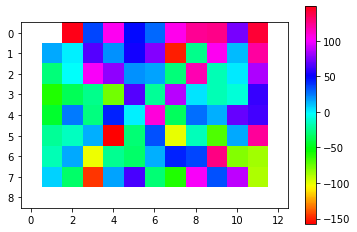

In [6]:
#create arrays of x,y over the raster extension
gridX,gridY = np.meshgrid(xRange, yRange)

#interpolate over the grid
tryVal = [i * 60 for i in values]
gridPh = griddata(points, tryVal, (gridX,gridY), method='linear')
#show interpolated values
plt.imshow(gridPh)
imgplot = plt.imshow(gridPh)
imgplot.set_cmap('hsv')
plt.colorbar()
plt.show()

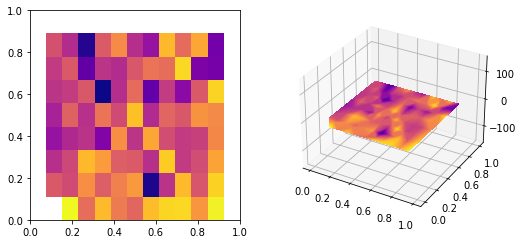

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

#Attempt at a 3D rastererization of passes
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

xx, yy = np.meshgrid(np.linspace(0, 1, 13), np.linspace(0, 1,9))

X = xx
Y = yy
Z = 10 * np.ones(X.shape)

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.imshow(gridPh, cmap="plasma", interpolation='nearest', origin='lower', extent=[0, 1, 0, 1])

ax2 = fig.add_subplot(122, projection='3d')
ax2.contourf(X, Y, gridPh, 100, zdir='z', offset=0.5, cmap="plasma")

plt.show()

In [8]:
hsv_modified = cm.get_cmap('hsv', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
newcmp = ListedColormap(hsv_modified(np.linspace(0.3, 0.7, 256)))# show figure

# define top and bottom colormaps 
top = cm.get_cmap('Reds_r', 128) # r means reversed version
middle = cm.get_cmap("Greens", 128)
middleR = cm.get_cmap("Greens_r", 128)
gees =np.vstack((middle(np.linspace(0, 1, 128)),
                       middleR(np.linspace(0, 1, 128))))
greens = ListedColormap(gees, name='greens')
green2 = cm.get_cmap(greens, 128)
bottom = cm.get_cmap('Reds', 128)# combine it all
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       green2(np.linspace(0,1,128)),
                       bottom(np.linspace(0, 1, 128))))# create a new colormaps with a name of OrangeBlue
red_blue = ListedColormap(newcolors, name='RedBlue')

In [9]:
URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
robotto_regular = FontManager(URL)

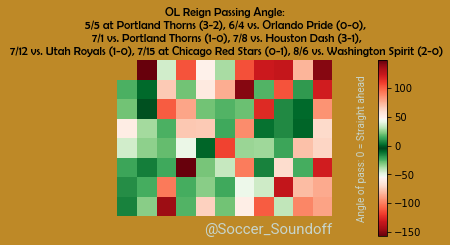

In [10]:
fig, ax = plt.subplots()
hfont = {'fontname':'Berlin Sans FB'}
# Giving title to the plot
plt.title("OL Reign Passing Angle:\n5/5 at Portland Thorns (3-2), 6/4 vs. Orlando Pride (0-0),\n 7/1 vs. Portland Thorns (1-0), 7/8 vs. Houston Dash (3-1),\n 7/12 vs. Utah Royals (1-0), 7/15 at Chicago Red Stars (0-1), 8/6 vs. Washington Spirit (2-0)",
          **hfont)
#Plotting rasterized data
plt.imshow(gridPh)
imgplot = plt.imshow(gridPh)
imgplot.set_cmap(red_blue)
plt.axis('off')
plt.grid('off')
fig.patch.set_facecolor('#BE8927')
plt.colorbar()
ax.text(11.5, 8.2, '@Soccer_Soundoff', color='#c7d5cc',
                    va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop)
ax.text(13, 4, "Angle of pass: 0 = Straight ahead", color='#c7d5cc',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=10, rotation=90)
plt.show()